In [95]:
import tradingeconomics as te
import os
import numpy as np
import matplotlib.pyplot as plt

te_key = os.getenv('TE_KEY')

In [96]:
te.login(te_key)

'Logged with 9f9c11e4bc60419'

In [97]:
symbol = 'NZSE50FG:IND'
daily_df = te.fetchMarkets(symbol=symbol, initDate='2013-01-01', endDate='2024-03-31', output_type='df')

In [98]:
daily_df = daily_df.iloc[1:]
daily_df

,Symbol,Date,Open,High,Low,Close
1,NZSE50FG:IND,03/01/2013,4066.513,4099.865,4066.513,4082.366
2,NZSE50FG:IND,04/01/2013,4082.366,4093.979,4072.349,4075.038
3,NZSE50FG:IND,07/01/2013,4075.038,4088.718,4073.132,4084.841
4,NZSE50FG:IND,08/01/2013,4084.841,4090.677,4074.744,4090.369
5,NZSE50FG:IND,09/01/2013,4090.369,4107.515,4090.369,4103.542
...,...,...,...,...,...,...
3006,NZSE50FG:IND,22/03/2024,11915.710,12002.470,11915.710,11978.620
3007,NZSE50FG:IND,25/03/2024,11978.620,12096.700,11911.900,12067.030
3008,NZSE50FG:IND,26/03/2024,12067.030,12078.000,11988.050,12031.810
3009,NZSE50FG:IND,27/03/2024,12031.810,12035.770,11981.550,12010.660


<h1>Calculate log return (Volatility) of SET50</h1>

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/6b/9dn_js8506z6dyt7bzmv36dr0000gn/T/ipykernel_69363/3749502471.py:1: SyntaxWarning: invalid escape sequence '\s'
  """


,Symbol,Date,Open,High,Low,Close,Log_Return,Volatility
1,NZSE50FG:IND,03/01/2013,4066.513,4099.865,4066.513,4082.366,NaN,NaN
2,NZSE50FG:IND,04/01/2013,4082.366,4093.979,4072.349,4075.038,-0.001797,NaN
3,NZSE50FG:IND,07/01/2013,4075.038,4088.718,4073.132,4084.841,0.002403,NaN
4,NZSE50FG:IND,08/01/2013,4084.841,4090.677,4074.744,4090.369,0.001352,NaN
5,NZSE50FG:IND,09/01/2013,4090.369,4107.515,4090.369,4103.542,0.003215,NaN
...,...,...,...,...,...,...,...,...
3006,NZSE50FG:IND,22/03/2024,11915.710,12002.470,11915.710,11978.620,0.005266,0.109007
3007,NZSE50FG:IND,25/03/2024,11978.620,12096.700,11911.900,12067.030,0.007354,0.108728
3008,NZSE50FG:IND,26/03/2024,12067.030,12078.000,11988.050,12031.810,-0.002923,0.108775
3009,NZSE50FG:IND,27/03/2024,12031.810,12035.770,11981.550,12010.660,-0.001759,0.108026


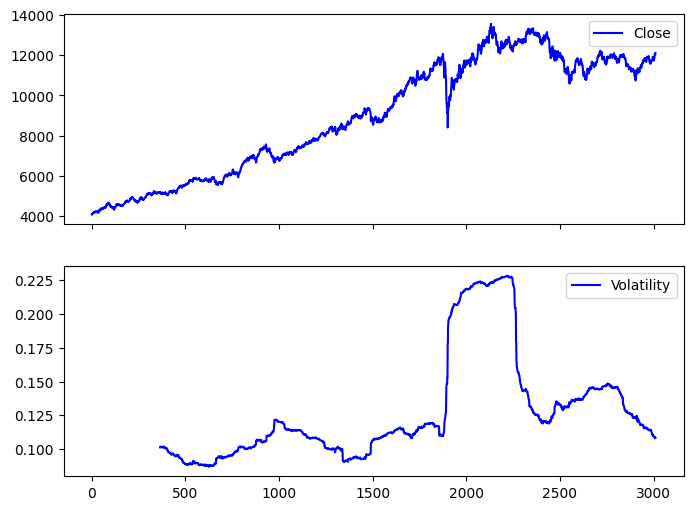

In [99]:
"""
#? sigma_T = sigma \sqrt{T}
#? sigma_T	=	volatility over a time horizon
#? sigma	=	standard deviation of returns
#? T	=	number of periods in a time horizon
"""

time_frame = 365
daily_df['Log_Return'] = np.log(daily_df.Close) - np.log(daily_df.Close.shift(1))
daily_df['Volatility'] = daily_df.Log_Return.rolling(window=time_frame).std() * np.sqrt(time_frame)
daily_df[['Close', 'Volatility']].plot(subplots=True, color= 'b', figsize=(8,6))
daily_df

<h1>Trading Algo with Moving Averages</h1>
Buy signal (go long) the 61d trend is for the first time SD points above the 365d trend.

Wait (park in cash) the 61d trend is within a range of +/– SD points around the 365d trend.

Sell signal (go short) the 61d trend is for the first time SD points below the 365d trend

<Axes: >

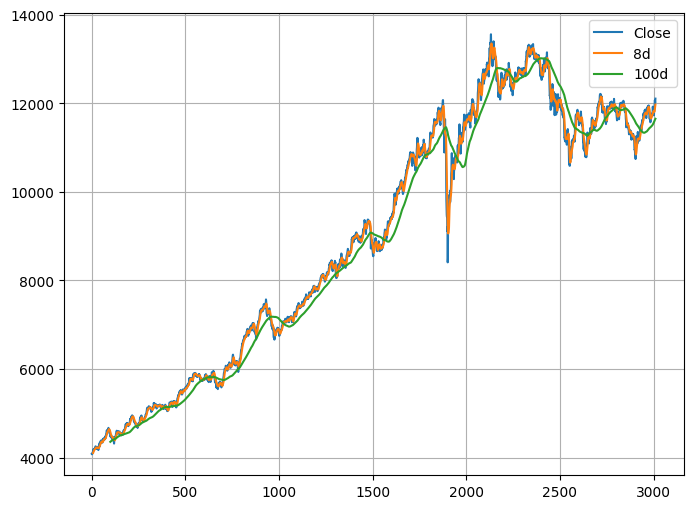

In [100]:
fast_ma = 8
slow_ma = 100
fast_ma_col = str(fast_ma)+ 'd'
slow_ma_col = str(slow_ma)+ 'd'
daily_df[fast_ma_col] =  np.round(daily_df.Close.rolling(window=fast_ma).mean(), 2)
daily_df[slow_ma_col] =  np.round(daily_df.Close.rolling(window=slow_ma).mean(), 2)

daily_df[['Close', fast_ma_col, slow_ma_col]].tail()
daily_df[['Close', fast_ma_col, slow_ma_col]].plot(grid=True, figsize=(8,6))

In [101]:
daily_df['MA_Diff'] = daily_df[fast_ma_col] - daily_df[slow_ma_col]
daily_df.tail()

,Symbol,Date,Open,High,Low,Close,Log_Return,Volatility,8d,100d,MA_Diff
3006,NZSE50FG:IND,22/03/2024,11915.71,12002.47,11915.71,11978.62,0.005266,0.109007,11832.16,11614.73,217.43
3007,NZSE50FG:IND,25/03/2024,11978.62,12096.70,11911.90,12067.03,0.007354,0.108728,11864.41,11624.95,239.46
3008,NZSE50FG:IND,26/03/2024,12067.03,12078.00,11988.05,12031.81,-0.002923,0.108775,11892.35,11634.08,258.27
3009,NZSE50FG:IND,27/03/2024,12031.81,12035.77,11981.55,12010.66,-0.001759,0.108026,11922.81,11641.58,281.23
3010,NZSE50FG:IND,28/03/2024,12010.66,12117.94,11950.78,12105.29,0.007848,0.108194,11969.97,11650.39,319.58


In [102]:
SD=50
daily_df['Regime'] = np.where(daily_df.MA_Diff > SD, 1, 0)
daily_df['Regime'] = np.where(daily_df.MA_Diff < -SD, -1, daily_df['Regime'])
daily_df.Regime.value_counts()

Regime
 1    1946
-1     658
 0     406
Name: count, dtype: int64

In [103]:
daily_df

,Symbol,Date,Open,High,Low,Close,Log_Return,Volatility,8d,100d,MA_Diff,Regime
1,NZSE50FG:IND,03/01/2013,4066.513,4099.865,4066.513,4082.366,NaN,NaN,NaN,NaN,NaN,0
2,NZSE50FG:IND,04/01/2013,4082.366,4093.979,4072.349,4075.038,-0.001797,NaN,NaN,NaN,NaN,0
3,NZSE50FG:IND,07/01/2013,4075.038,4088.718,4073.132,4084.841,0.002403,NaN,NaN,NaN,NaN,0
4,NZSE50FG:IND,08/01/2013,4084.841,4090.677,4074.744,4090.369,0.001352,NaN,NaN,NaN,NaN,0
5,NZSE50FG:IND,09/01/2013,4090.369,4107.515,4090.369,4103.542,0.003215,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3006,NZSE50FG:IND,22/03/2024,11915.710,12002.470,11915.710,11978.620,0.005266,0.109007,11832.16,11614.73,217.43,1
3007,NZSE50FG:IND,25/03/2024,11978.620,12096.700,11911.900,12067.030,0.007354,0.108728,11864.41,11624.95,239.46,1
3008,NZSE50FG:IND,26/03/2024,12067.030,12078.000,11988.050,12031.810,-0.002923,0.108775,11892.35,11634.08,258.27,1
3009,NZSE50FG:IND,27/03/2024,12031.810,12035.770,11981.550,12010.660,-0.001759,0.108026,11922.81,11641.58,281.23,1


<h1>1 means long the market 0 means stay cash -1 means short the market</h1>

(-1.1, 1.1)

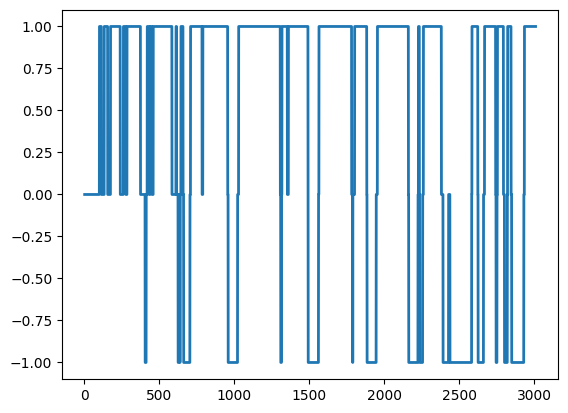

In [104]:
daily_df.Regime.plot(lw=2)
plt.ylim([-1.1, 1.1])

<Axes: >

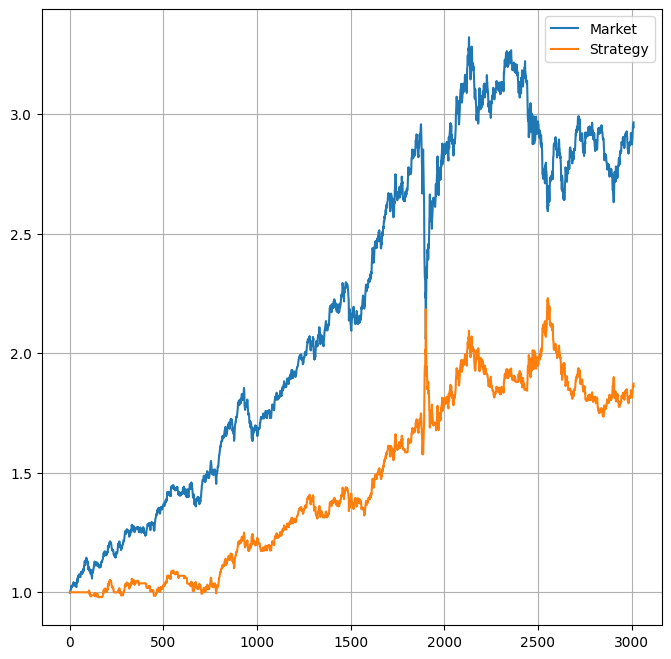

In [105]:
#Market daily return
daily_df['Market'] = np.log(daily_df.Close) - np.log(daily_df.Close.shift(1))

#Strategy daily return
daily_df['Strategy'] = daily_df.Regime.shift(1) * daily_df.Market

daily_df[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8,8))